# Machine Learning Mini Project 2
### - Merint Thomas Mathew


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

## Now we will load the Digits Dataset

In [2]:
digits_data = pd.read_csv('D:\MSc Data Engineering\Semester 2\Machine Learning\Mini proj\Project 1\DigitsBasicRoutines\DigitsBasicRoutines\mfeat-pix.txt', delimiter="  ", header=None,engine="python").values
digits_zeros=[]
for i in range(0,2000):
    digits_zeros.append(digits_data[i].reshape(16,15))
digits_data = pd.DataFrame(digits_data)
print(digits_data)

      0    1    2    3    4    5    6    7    8    9    ...  230  231  232  \
0       0    3    4    4    6    6    6    6    6    5  ...    4    4    4   
1       0    0    0    0    0    0    1    3    4    4  ...    2    4    4   
2       0    0    1    4    4    4    4    4    4    3  ...    1    3    4   
3       0    0    3    3    2    2    4    5    6    6  ...    4    4    4   
4       0    0    0    0    0    0    3    4    6    6  ...    4    4    4   
5       0    0    0    0    0    0    0    0    0    5  ...    4    4    2   
6       0    3    4    4    6    6    6    5    4    5  ...    4    4    4   
7       0    0    0    3    6    6    6    6    6    6  ...    4    4    4   
8       0    0    3    4    6    6    6    6    6    6  ...    4    4    4   
9       0    1    2    4    4    4    4    4    4    4  ...    2    2    3   
10      0    0    0    0    0    2    4    6    6    6  ...    0    1    3   
11      0    0    1    5    6    5    5    6    5    4  ...    4

## Creating 10-dimensional target vector zi or Labels

#### Here we will create the target vector which is zero everywhere except at the position corresponding to the class number of the pattern xi, where it is set to 1. Taking first 200 points as class number '0' and so on

In [3]:
w, h = 1, 2000;
sam = [[0 for x in range(w)] for y in range(h)] 

for i in range(0,200):
    sam[i][0]=0
for i in range(200,400):
    sam[i][0]=1
for i in range(400,600):
    sam[i][0]=2
for i in range(600,800):
    sam[i][0]=3
for i in range(800,1000):
    sam[i][0]=4
for i in range(1000,1200):
    sam[i][0]=5
for i in range(1200,1400):
    sam[i][0]=6
for i in range(1400,1600):
    sam[i][0]=7
for i in range(1600,1800):
    sam[i][0]=8
for i in range(1800,2000):
    sam[i][0]=9
    
sam= np.array(sam)


In [6]:
target = []
for x in range(0,2000):
    row = []
    for y in range(0,10):
        if sam[x]==y:
            row.append(1)
        else:
            row.append(0)
    target.append(row)
print(target)

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 

In [411]:
target_df = pd.DataFrame(target)
target_df

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0


## Splitting Data

#### Here we split the data by slicing it to form 100 observations of each digit as Train data and the remaining 100 observations as Test Data

#### Train Data

In [412]:
t0= digits_data.loc[:99] 
t1= digits_data.loc[200:299]
t2= digits_data.loc[400:499]
t3= digits_data.loc[600:699]
t4= digits_data.loc[800:899]
t5= digits_data.loc[1000:1099]
t6= digits_data.loc[1200:1299]
t7= digits_data.loc[1400:1499]
t8= digits_data.loc[1600:1699]
t9= digits_data.loc[1800:1899]

T1 = t0.append(pd.DataFrame(data = t1))
T2 = T1.append(pd.DataFrame(data = t2))
T3 = T2.append(pd.DataFrame(data = t3))
T4 = T3.append(pd.DataFrame(data = t4))
T5 = T4.append(pd.DataFrame(data = t5))
T6 = T5.append(pd.DataFrame(data = t6))
T7 = T6.append(pd.DataFrame(data = t7))
T8 = T7.append(pd.DataFrame(data = t8))
T9 = T8.append(pd.DataFrame(data = t9))
Train_data = T9 
Train_data

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,0,3,4,4,6,6,6,6,6,5,...,4,4,4,4,4,3,0,0,0,0
1,0,0,0,0,0,0,1,3,4,4,...,2,4,4,4,4,2,0,0,0,0
2,0,0,1,4,4,4,4,4,4,3,...,1,3,4,4,4,4,4,2,1,0
3,0,0,3,3,2,2,4,5,6,6,...,4,4,4,4,2,0,0,0,0,0
4,0,0,0,0,0,0,3,4,6,6,...,4,4,4,4,3,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,5,...,4,4,2,0,0,0,0,0,0,0
6,0,3,4,4,6,6,6,5,4,5,...,4,4,4,4,4,4,4,3,0,0
7,0,0,0,3,6,6,6,6,6,6,...,4,4,4,4,3,0,0,0,0,0
8,0,0,3,4,6,6,6,6,6,6,...,4,4,4,4,4,4,4,4,1,0
9,0,1,2,4,4,4,4,4,4,4,...,2,2,3,3,2,2,2,2,1,0


#### Train Labels

In [413]:
lr0= target_df.loc[0:99] 
lr1= target_df.loc[200:299]
lr2= target_df.loc[400:499]
lr3= target_df.loc[600:699]
lr4= target_df.loc[800:899]
lr5= target_df.loc[1000:1099]
lr6= target_df.loc[1200:1299]
lr7= target_df.loc[1400:1499]
lr8= target_df.loc[1600:1699]
lr9= target_df.loc[1800:1899]

L1 = lr0.append(pd.DataFrame(data = lr1))
L2 = L1.append(pd.DataFrame(data = lr2))
L3 = L2.append(pd.DataFrame(data = lr3))
L4 = L3.append(pd.DataFrame(data = lr4))
L5 = L4.append(pd.DataFrame(data = lr5))
L6 = L5.append(pd.DataFrame(data = lr6))
L7 = L6.append(pd.DataFrame(data = lr7))
L8 = L7.append(pd.DataFrame(data = lr8))
L9 = L8.append(pd.DataFrame(data = lr9))
Train_label = L9 
Train_label 


,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0


#### Test Data

In [414]:
ts0= digits_data.loc[100:199] 
ts1= digits_data.loc[300:399]
ts2= digits_data.loc[500:599]
ts3= digits_data.loc[700:799]
ts4= digits_data.loc[900:999]
ts5= digits_data.loc[1100:1199]
ts6= digits_data.loc[1300:1399]
ts7= digits_data.loc[1500:1599]
ts8= digits_data.loc[1700:1799]
ts9= digits_data.loc[1900:1999]

Ts1 = ts0.append(pd.DataFrame(data = ts1))
Ts2 = Ts1.append(pd.DataFrame(data = ts2))
Ts3 = Ts2.append(pd.DataFrame(data = ts3))
Ts4 = Ts3.append(pd.DataFrame(data = ts4))
Ts5 = Ts4.append(pd.DataFrame(data = ts5))
Ts6 = Ts5.append(pd.DataFrame(data = ts6))
Ts7 = Ts6.append(pd.DataFrame(data = ts7))
Ts8 = Ts7.append(pd.DataFrame(data = ts8))
Ts9 = Ts8.append(pd.DataFrame(data = ts9))
Test_data = Ts9 
Test_data 

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
100,0,0,1,4,6,6,6,6,5,4,...,4,4,4,4,4,4,4,3,0,0
101,0,0,0,0,3,6,6,5,1,0,...,4,4,4,4,4,4,3,0,0,0
102,0,0,0,0,0,2,4,5,6,6,...,4,4,4,4,3,0,0,0,0,0
103,0,0,0,0,3,5,6,4,4,4,...,4,4,4,4,4,4,4,4,3,0
104,0,0,3,5,6,6,6,6,6,6,...,4,4,4,4,4,4,2,0,0,0
105,0,1,4,4,5,6,6,6,6,6,...,4,4,4,4,4,4,1,0,0,0
106,3,6,6,4,1,0,0,0,0,0,...,0,0,0,0,0,3,4,4,4,3
107,0,0,0,0,0,0,0,0,3,6,...,1,0,0,0,0,0,0,0,0,0
108,0,0,1,4,5,6,6,3,0,0,...,4,4,4,4,4,4,2,0,0,0
109,0,0,0,1,5,6,5,4,2,0,...,4,4,4,4,3,0,0,0,0,0


#### Test Labels

In [415]:
ls0= target_df.loc[100:199] 
ls1= target_df.loc[300:399]
ls2= target_df.loc[500:599]
ls3= target_df.loc[700:799]
ls4= target_df.loc[900:999]
ls5= target_df.loc[1100:1199]
ls6= target_df.loc[1300:1399]
ls7= target_df.loc[1500:1599]
ls8= target_df.loc[1700:1799]
ls9= target_df.loc[1900:1999]

Ls1 = ls0.append(pd.DataFrame(data = ls1))
Ls2 = Ls1.append(pd.DataFrame(data = ls2))
Ls3 = Ls2.append(pd.DataFrame(data = ls3))
Ls4 = Ls3.append(pd.DataFrame(data = ls4))
Ls5 = Ls4.append(pd.DataFrame(data = ls5))
Ls6 = Ls5.append(pd.DataFrame(data = ls6))
Ls7 = Ls6.append(pd.DataFrame(data = ls7))
Ls8 = Ls7.append(pd.DataFrame(data = ls8))
Ls9 = Ls8.append(pd.DataFrame(data = ls9))
Test_labels = Ls9 


Converting Test and Train labels to arrays

In [416]:
Z = np.array(Train_label)
Y = np.array(Test_labels)

## Using Pricipal Component Analysis

#### Using Singular-Value Decomposition to derive PCA for Train Data

In [417]:
def pca(Data):  
    X = (Data - Data.mean()) / Data.std()
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    U, S, V = np.linalg.svd(cov)
    return U, S, V 
  

In [418]:
def project_data(Data, U, k):  
    U_reduced = U[:,:k]
    return np.dot(Data, U_reduced)

Building a cross-validation set up for K folds PCA

In [419]:
K=50


Further looking at k folds for Train Data and then padding with a trailing 1 as bias

In [420]:
U, S, V = pca(Train_data)

for i in range(K):
    P = project_data(Train_data, U, i+1)
    
P=np.concatenate((np.ones((1000,1)),P), axis=1)
P.shape

(1000, 51)

Now following the same with Test Data and then padding it also with a trainling 1 as bias

In [421]:
U1, S1, V1 = pca(Test_data) 

for i in range(K):
    P1 = project_data(Test_data, U1, i+1)
    
P1=np.concatenate((np.ones((1000,1)),P1), axis=1)
P1.shape

(1000, 51)

## Ridge Regression and MSE/Missclassification calculation for Train and Test

### Ridge, MSE, Missclassification Rate functions

First we begin with ridge regression where we define a function for ridge based on the formula

In [422]:
def compute_linreg(P,Z, alpha=0.0):
    ridge_factor = alpha*alpha*np.identity(P.shape[1]) # Imxm identity matrix
    Wopt = np.linalg.inv((np.dot(P.T, P))/1000 + ridge_factor).dot(P.T).dot(Z)/1000
    return Wopt.T

Creating the Mean Squared Error function for calculation of MSE

In [423]:
def predict_vector_ridge(feature_vector,weights):
    return np.matmul(weights,feature_vector)

#Calculating MSE_test
def calculate_mse_ridge(coeffs,P,Z):
    total_mse=0
    for i in range(P.shape[0]):
        total_mse += (np.linalg.norm(Z[i]- np.array(predict_vector_ridge(P[i].transpose(),coeffs)).reshape(10,)))**2
    return total_mse/P.shape[0]

Creating the Accuracy Function for calculating Accuracy

In [424]:
def predict_number_ridge(F,S):
    result_vector = np.matmul(S, F)
    return np.argmax(result_vector)

def calc_acc_ridge(sol,features,response):
    result=0
    increment =1/features.shape[0]
    for i in range (features.shape[0]):
        if response[i][np.array(predict_number_ridge(features[i].transpose(),sol))]==1:
            result+= increment
    return result

Choosing the Alpha value

In [425]:
Alpha = 0.0

### Train Data

Calculating the coefficients

In [426]:
coeffs= compute_linreg(P,Z,Alpha)
coeffs.shape

(10, 51)

Calculating MSE

In [427]:
Train_mse= calculate_mse_ridge(coeffs,P,Z)
Train_mse

0.2928838108537381

Calculating Accuracy

In [428]:
Train_acc = calc_acc_ridge(coeffs,P,Z)
Train_acc

0.9540000000000007

Missclassification Rate

In [429]:
missclassification = 1 - Train_acc
missclassification

0.045999999999999264

### Test Data

Calculating the coefficients

In [430]:
coeffs_test= compute_linreg(P1,Y,Alpha)
coeffs_test.shape

(10, 51)

Calculating Test MSE 

In [431]:
Test_mse= calculate_mse_ridge(coeffs_test,P1,Y)
Test_mse

0.28696399263857

Calculating Test Accuracy

In [432]:
Test_acc = calc_acc_ridge(coeffs_test,P1,Y)
Test_acc

0.9570000000000007

Test Missclassification Rate

In [433]:
missclassification_test = 1 - Test_acc
missclassification_test

0.04299999999999926

## Plotting

### Plots for Alpha = 0

Train MSEs for different values of K. Forming a dictionary of calculations and calculating the mean values

In [434]:
mse_train = {
    30:0.31940938205244007,
    35:0.3107355346776892,
    50:0.29288381085373816,
    60:0.28665415718211,
    80:0.2715032087602649,
    100:0.26230323285660995,
    150:0.242142017049942,
    200:0.2252394773052203
}   

In [435]:
count = 0
_sum = 0
for key in mse_train:
    count += 1
    _sum += mse_train[key]

print('Mean Train MSE for Aphpa = 0: ', _sum/count)

Mean Train MSE for Aphpa = 0:  0.27635885259225185


Train missclassification rates for different values of K. Forming a dictionary of calculations and calculating the mean values

In [436]:
miss_train = {
    30:0.056999999999999273,
    35:0.05599999999999927,
    50:0.045999999999999264,
    60:0.04499999999999926,
    80:0.04399999999999926,
    100:0.036999999999999256,
    150:0.02899999999999925,
    200:0.027999999999999248
}

In [437]:
count = 0
_sum = 0
for key in miss_train:
    count += 1
    _sum += miss_train[key]

print('Mean Missclassification Rate MSE for Aphpa = 0: ', _sum/count)

Mean Missclassification Rate MSE for Aphpa = 0:  0.04274999999999926


Test MSEs for different values of K. Forming a dictionary of calculations and calculating the mean values

In [438]:
mse_test ={
    30:0.31504410275792194,
    35:0.3037559438538961,
    50:0.28696399263857003,
    60:0.27845177621399975,
    80:0.2640090762607644,
    100:0.25402154001100774,
    150:0.23514363931147175,
    200:0.219160593736467
}

In [439]:
count = 0
_sum = 0
for key in mse_test:
    count += 1
    _sum += mse_test[key]

print('Mean Test MSE for Aphpa = 0: ', _sum/count)

Mean Test MSE for Aphpa = 0:  0.26956883309801233


Test missclassification rates for different values of K. Forming a dictionary of calculations and calculating the mean values

In [440]:
miss_test={
    30:0.05599999999999927,
    35:0.048999999999999266,
    50:0.04299999999999926,
    60:0.03899999999999926,
    80:0.036999999999999256,
    100:0.03399999999999925,
    150:0.023999999999999244,
    200:0.02099999999999924
}

In [441]:
count = 0
_sum = 0
for key in miss_test:
    count += 1
    _sum += miss_test[key]

print('Mean Train Missclassification Rate for Aphpa = 0: ', _sum/count)

Mean Train Missclassification Rate for Aphpa = 0:  0.037874999999999256


Deriving and separating plot coordinates from the dictionaries

In [442]:
lists_mse_train = sorted(mse_train.items())
x, y = zip(*lists_mse_train)

lists_miss_train = sorted(miss_train.items()) 
a, b = zip(*lists_miss_train)

lists_mse_test = sorted(mse_test.items()) 
m, n = zip(*lists_mse_test)

lists_miss_test = sorted(miss_test.items())
r, s = zip(*lists_miss_test)

Plotting

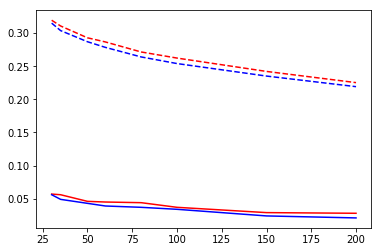

In [443]:
pl.plot(x,y,'r',linestyle='dashed')
pl.plot(a,b,'r')
pl.plot(m,n,'b',linestyle='dashed')
pl.plot(r,s,'b')
pl.show()

### Plots for Alpha =5

In [444]:
mse_train1 ={
    50:0.29878748359382806,
    100:0.2679246949743754,
    150:0.24785229165406264,
    200:0.2308301824732229
}

In [451]:
count = 0
_sum = 0
for key in mse_train1:
    count += 1
    _sum += mse_train1[key]

print('Mean Train MSE for Aphpa =5: ', _sum/count)

Mean Train MSE for Aphpa =5:  0.26134866317387223


In [446]:
miss_train1={
    50:0.05099999999999927,
    100:0.03899999999999926,
    150:0.03099999999999925,
    200:0.02899999999999925
}

In [452]:
count = 0
_sum = 0
for key in miss_train1:
    count += 1
    _sum += miss_train1[key]

print('Mean Train Missclassification Rate for Aphpa =5: ', _sum/count)

Mean Train Missclassification Rate for Aphpa =5:  0.037499999999999256


In [453]:
mse_test1={
    50:0.29302752955496897,
    100:0.2600288074689388,
    150:0.24127832603457727,
    200:0.22523675811453434
}

In [454]:
count = 0
_sum = 0
for key in mse_test1:
    count += 1
    _sum += mse_test1[key]

print('Mean Test MSE for Aphpa =5: ', _sum/count)

Mean Test MSE for Aphpa =5:  0.25489285529325484


In [455]:
miss_test1={
    50:0.04999999999999927,
    100:0.04099999999999926,
    150:0.027999999999999248,
    200:0.01899999999999924
}

In [456]:
count = 0
_sum = 0
for key in miss_test1:
    count += 1
    _sum += miss_test1[key]

print('Mean Train Missclassification Rate for Aphpa =5: ', _sum/count)

Mean Train Missclassification Rate for Aphpa =5:  0.034499999999999253


Deriving and separating plot coordinates from the dictionaries


In [457]:
lists_mse_train_1 = sorted(mse_train1.items())
x, y = zip(*lists_mse_train_1)

lists_miss_train_1 = sorted(miss_train1.items()) 
a, b = zip(*lists_miss_train_1)

lists_mse_test_1 = sorted(mse_test1.items()) 
m, n = zip(*lists_mse_test_1)

lists_miss_test_1 = sorted(miss_test1.items())
r, s = zip(*lists_miss_test_1)

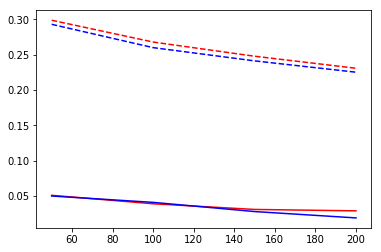

In [458]:
pl.plot(x,y,'r',linestyle='dashed')
pl.plot(a,b,'r')
pl.plot(m,n,'b',linestyle='dashed')
pl.plot(r,s,'b')
pl.show()